<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-05-27 18:04:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  65.3MB/s    in 2.3s    

2025-05-27 18:04:36 (65.3 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 163.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 145.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 135.7 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
df_check


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,None,None
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,None,None
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,None,None


## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


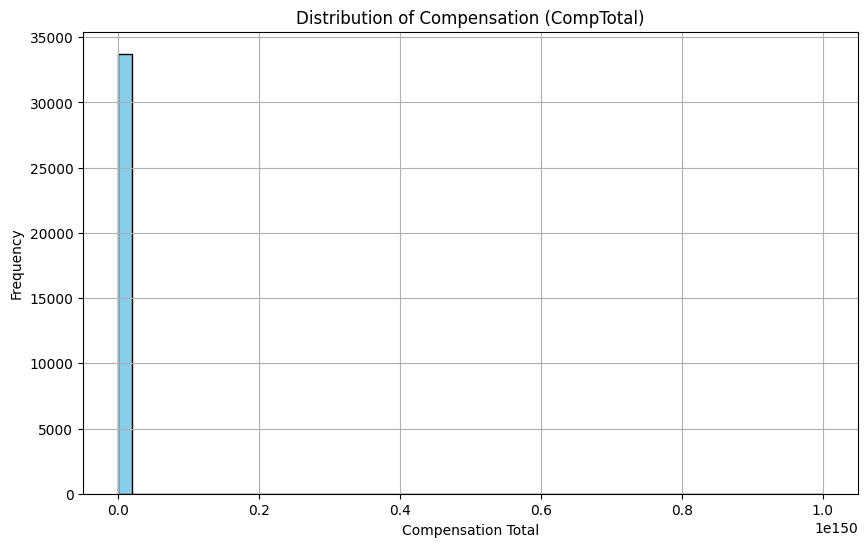

In [10]:
## Write your code here
query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""

df = pd.read_sql_query(query, conn)


df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df.dropna(subset=['CompTotal'], inplace=True)


plt.figure(figsize=(10,6))

plt.hist(df['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Compensation (CompTotal)')
plt.xlabel('Compensation Total')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

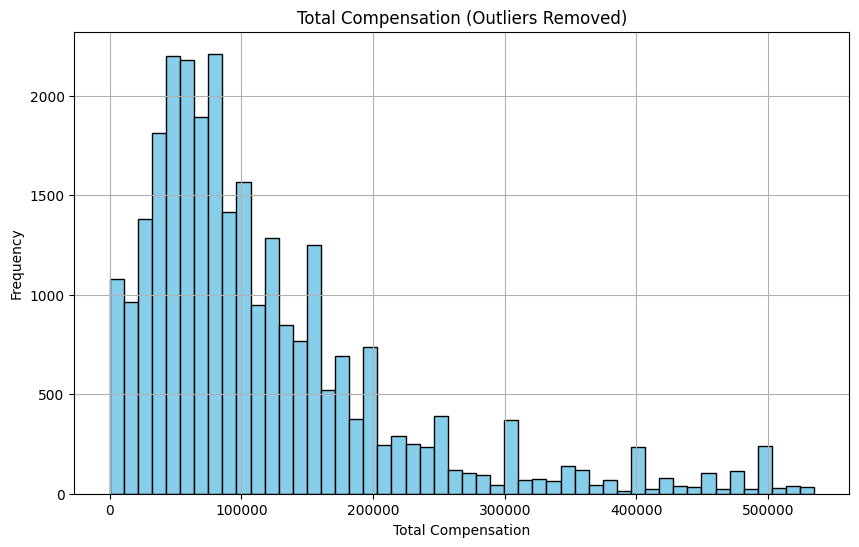

In [11]:
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_filtered = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Total Compensation (Outliers Removed)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

**Box Plots**

Plot a box plot of Age.


In [12]:
## Write your code here
Query = """
SELECT AGE 
FROM main 
WHERE AGE IS NOT NULL
"""

df = pd.read_sql_query(Query, conn)

df.head() 

,Age
0,Under 18 years old
1,35-44 years old
2,45-54 years old
3,18-24 years old
4,18-24 years old


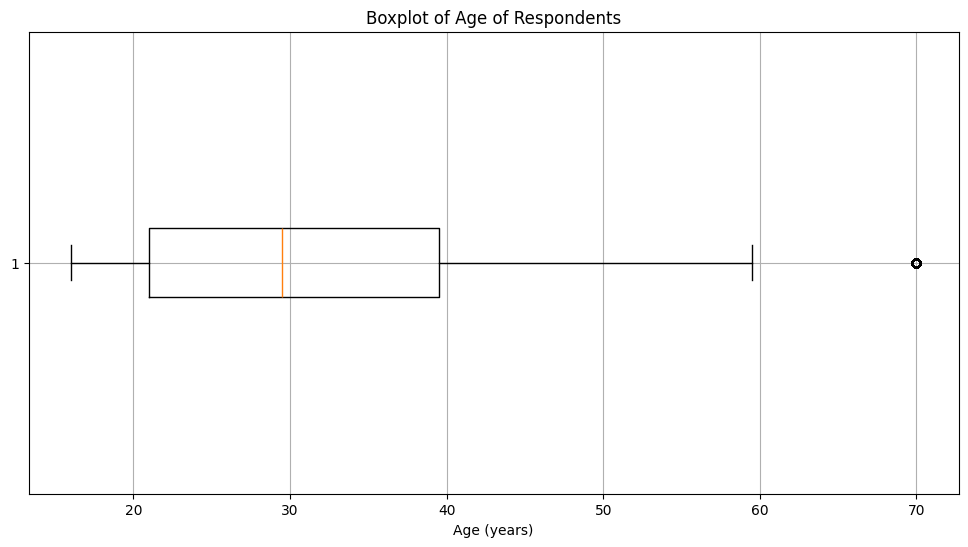

In [13]:
age_midpoints = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70}


df['AgeNumeric'] = df['Age'].map(age_midpoints)


df_clean = df.dropna(subset=['AgeNumeric'])


plt.figure(figsize=(12, 6))
plt.boxplot(df_clean['AgeNumeric'], vert=False)
plt.title("Boxplot of Age of Respondents")
plt.xlabel("Age (years)")
plt.grid(True)
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [14]:
## Write your code here
QUERY = """ 
SELECT Age, WorkExp
FROM main
WHERE Age IS NOT NULL AND WorkExp IS NOT NULL 
"""

df2 = pd.read_sql_query(QUERY, conn) 

df2.head() 

,Age,WorkExp
0,35-44 years old,17.0
1,35-44 years old,15.0
2,35-44 years old,12.0
3,45-54 years old,29.0
4,25-34 years old,12.0


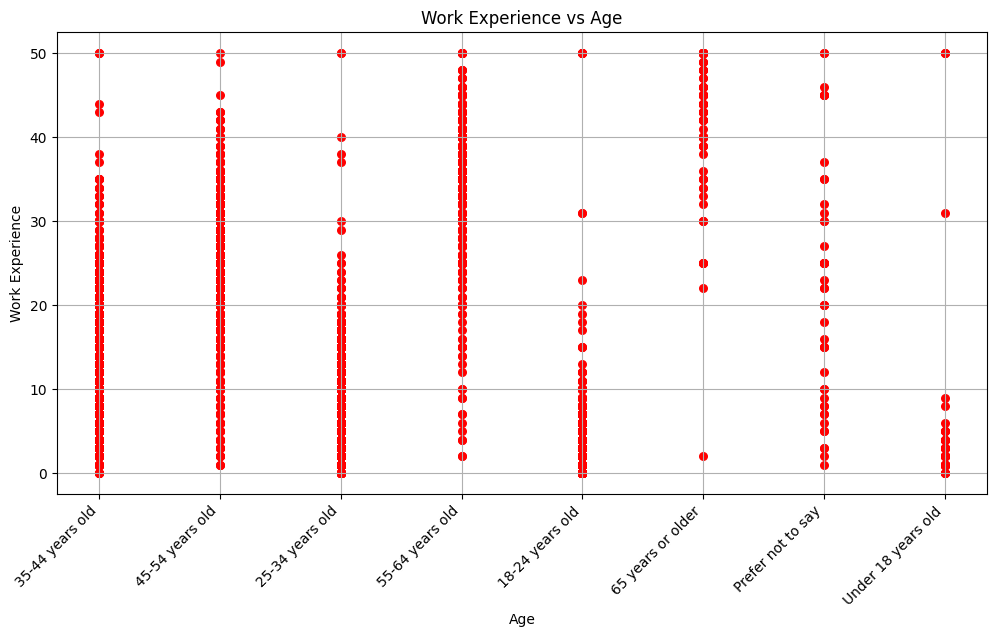

In [15]:
plt.figure(figsize=(12,6))

plt.scatter(x=df2["Age"], y=df2["WorkExp"], s=30, c="red", label="Scatterplot of Work Experience and Age") 

plt.title("Work Experience vs Age")
plt.xlabel("Age")
plt.ylabel("Work Experience")
plt.xticks(rotation=45, ha="right")
plt.grid(True)

plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [16]:
## Write your code here
queRY = """ 
SELECT Age, TimeSearching, Frustration
FROM main
WHERE Age IS NOT NULL
AND TimeSearching IS NOT NULL 
AND Frustration IS NOT NULL
"""

df_sentiment = pd.read_sql_query(queRY, conn)
df_sentiment.head()

,Age,TimeSearching,Frustration
0,35-44 years old,30-60 minutes a day,Amount of technical debt;Number of software to...
1,35-44 years old,30-60 minutes a day,Amount of technical debt;Complexity of tech st...
2,45-54 years old,60-120 minutes a day,Amount of technical debt;Complexity of tech st...
3,25-34 years old,15-30 minutes a day,Amount of technical debt;Tracking my work;Comp...
4,25-34 years old,Less than 15 minutes a day,Number of software tools in use;Tracking my wo...


In [17]:
df_sentiment["Frustration"] = df_sentiment["Frustration"].astype(str).str.split(";")
df_sentiment_exploded = df_sentiment.explode("Frustration")
df_sentiment_exploded["Frustration"] =  df_sentiment_exploded["Frustration"].str.strip().str.replace(" ", "_")
df_sentiment_clean = df_sentiment_exploded

df_sentiment_clean.isna().sum()



Age              0
TimeSearching    0
Frustration      0
dtype: int64

In [18]:
df_sentiment_clean.head()

,Age,TimeSearching,Frustration
0,35-44 years old,30-60 minutes a day,Amount_of_technical_debt
0,35-44 years old,30-60 minutes a day,Number_of_software_tools_in_use
0,35-44 years old,30-60 minutes a day,Tracking_my_work
0,35-44 years old,30-60 minutes a day,Showing_my_contributions
1,35-44 years old,30-60 minutes a day,Amount_of_technical_debt


In [19]:
df_sentiment_clean["Age"].value_counts()

Age
25-34 years old       36391
35-44 years old       23310
18-24 years old       11690
45-54 years old        8434
55-64 years old        2762
65 years or older       328
Under 18 years old      200
Prefer not to say       153
Name: count, dtype: int64

In [20]:
age_map = {"25-34 years old":29.5,
"35-44 years old":39.5,
"18-24 years old":21,
"45-54 years old":49.5,
"55-64 years old":59.5,
"65 years or older":70,
"Under 18 years old":15} 

df_sentiment_clean["Age"] = df_sentiment_clean["Age"].map(age_map)
df_sentiment_clean.head()

,Age,TimeSearching,Frustration
0,39.5,30-60 minutes a day,Amount_of_technical_debt
0,39.5,30-60 minutes a day,Number_of_software_tools_in_use
0,39.5,30-60 minutes a day,Tracking_my_work
0,39.5,30-60 minutes a day,Showing_my_contributions
1,39.5,30-60 minutes a day,Amount_of_technical_debt


In [21]:
df_sentiment_clean["TimeSearching"].value_counts()

TimeSearching
30-60 minutes a day           32311
15-30 minutes a day           21163
60-120 minutes a day          16132
Over 120 minutes a day         7120
Less than 15 minutes a day     6542
Name: count, dtype: int64

In [22]:
time_search ={"30-60 minutes a day": 45,
"15-30 minutes a day": 22.5,
"60-120 minutes a day ": 90,
"Over 120 minutes a day": 135,
"Less than 15 minutes a day":7.5} 

df_sentiment_clean["TimeSearching"] = df_sentiment_clean["TimeSearching"].map(time_search) 
df_sentiment_clean.head() 

,Age,TimeSearching,Frustration
0,39.5,45.0,Amount_of_technical_debt
0,39.5,45.0,Number_of_software_tools_in_use
0,39.5,45.0,Tracking_my_work
0,39.5,45.0,Showing_my_contributions
1,39.5,45.0,Amount_of_technical_debt


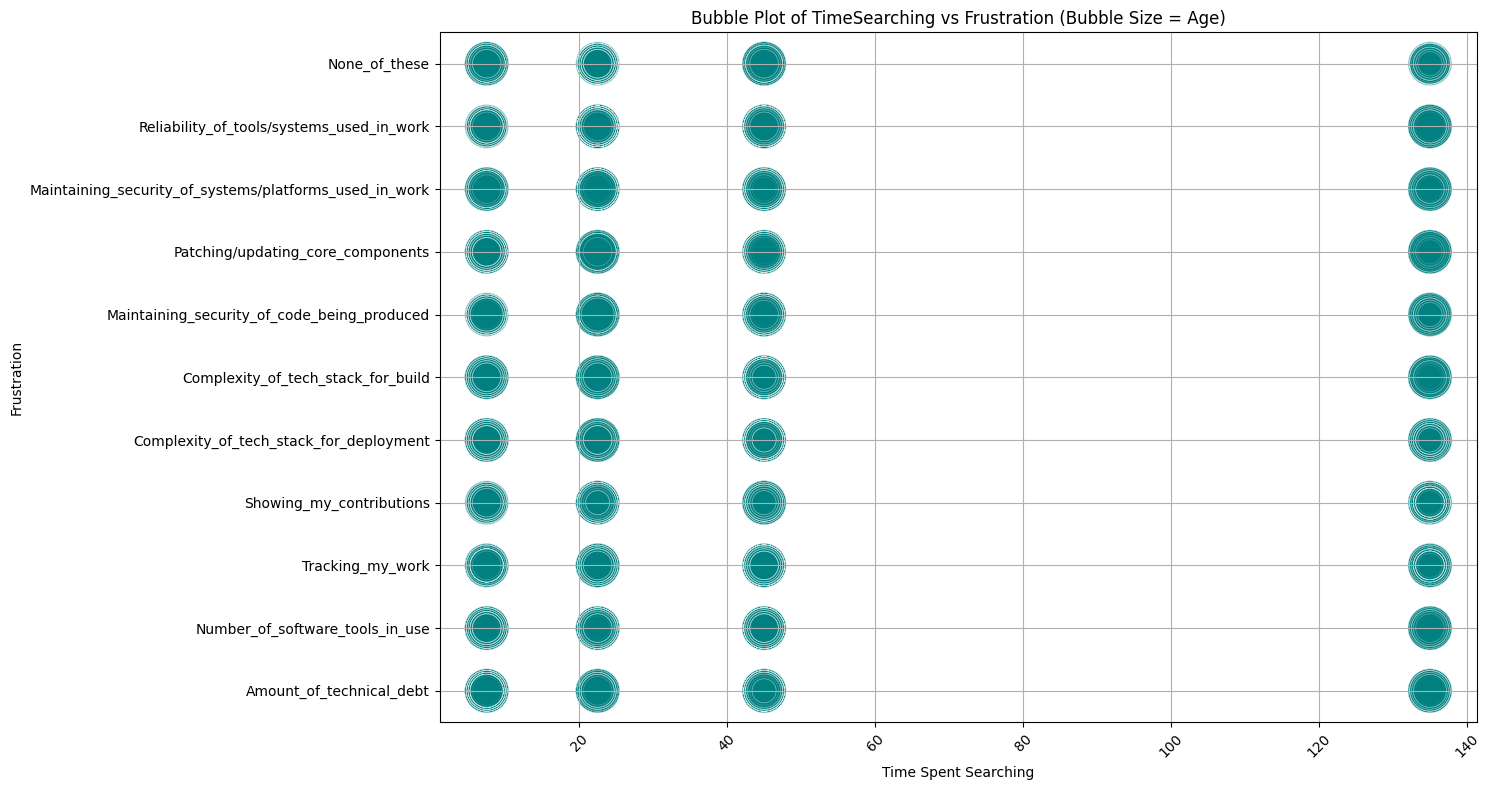

In [23]:
scaled_age = df_sentiment_clean["Age"] / df_sentiment_clean["Age"].max() * 1000

plt.figure(figsize=(15, 8))
plt.scatter(
    df_sentiment_clean["TimeSearching"],
    df_sentiment_clean["Frustration"],
    s=scaled_age,  # bubble size
    alpha=0.5,
    c="teal", 
    edgecolors="w", 
    linewidth=0.5)

plt.xlabel("Time Spent Searching")
plt.ylabel("Frustration")
plt.title("Bubble Plot of TimeSearching vs Frustration (Bubble Size = Age)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [24]:
qUeRy = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""

df_pie = pd.read_sql_query(qUeRy, conn)
df_pie.value_counts()


DatabaseWantToWorkWith                                                                                                                                                                                                                                                                                         
PostgreSQL                                                                                                                                                                                                                                                                                                         3738
PostgreSQL;SQLite                                                                                                                                                                                                                                                                                                  1533
SQLite                                                                  

In [25]:
df_pie["DatabaseWantToWorkWith"] = df_pie["DatabaseWantToWorkWith"].str.split(";")
df_explode = df_pie.explode("DatabaseWantToWorkWith")
df_explode["DatabaseWantToWorkWith"] = df_explode["DatabaseWantToWorkWith"].str.strip()

In [26]:
df_explode["DatabaseWantToWorkWith"].unique()

array(['PostgreSQL', 'Firebase Realtime Database', 'MongoDB', 'MySQL',
       'SQLite', 'Cloud Firestore', 'Supabase', 'Redis', 'Elasticsearch',
       'Microsoft SQL Server', 'Oracle', 'MariaDB', 'Presto', 'Dynamodb',
       'Cosmos DB', 'Microsoft Access', 'DuckDB', 'Cassandra',
       'Clickhouse', 'H2', 'Neo4J', 'Cockroachdb', 'Couch DB', 'RavenDB',
       'BigQuery', 'Databricks SQL', 'Firebird', 'Snowflake', 'Datomic',
       'IBM DB2', 'InfluxDB', 'EventStoreDB', 'Couchbase', 'Solr', 'TiDB'],
      dtype=object)

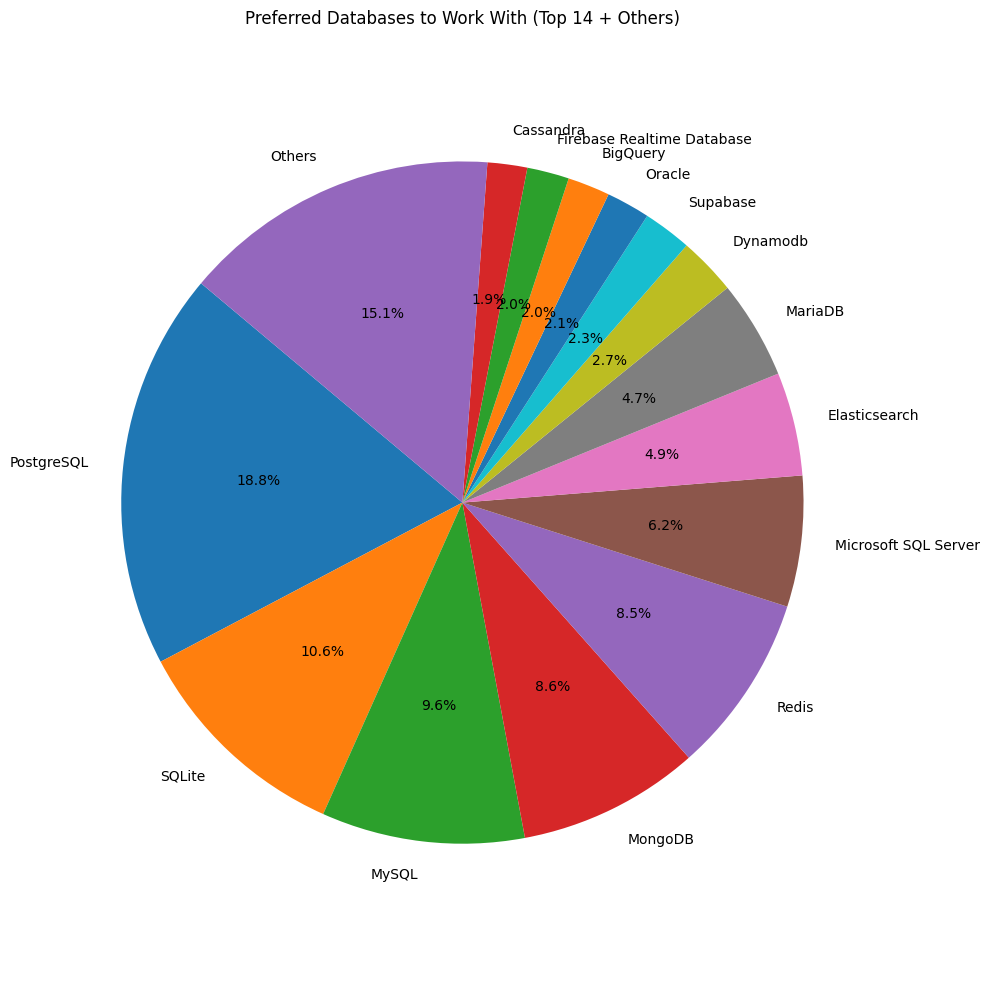

In [27]:
db_counts = df_explode["DatabaseWantToWorkWith"].value_counts()

top_14 = db_counts[:14]

others = db_counts[14:].sum()
final_counts = pd.concat([top_14, pd.Series({"Others": others})])


plt.figure(figsize=(10, 10))
plt.pie(final_counts.values,
        labels=final_counts.index,
        autopct="%1.1f%%",
        startangle=140)
plt.title("Preferred Databases to Work With (Top 14 + Others)")
plt.axis("equal")
plt.tight_layout()
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [30]:
## Write your code here

querY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL AND TimeAnswering IS NOT NULL
"""
df_stacked = pd.read_sql_query(querY, conn) 
df_stacked

,Age,TimeSearching,TimeAnswering
0,35-44 years old,30-60 minutes a day,60-120 minutes a day
1,35-44 years old,30-60 minutes a day,15-30 minutes a day
2,45-54 years old,60-120 minutes a day,60-120 minutes a day
3,25-34 years old,15-30 minutes a day,30-60 minutes a day
4,25-34 years old,Less than 15 minutes a day,15-30 minutes a day
...,...,...,...
28746,18-24 years old,30-60 minutes a day,60-120 minutes a day
28747,18-24 years old,60-120 minutes a day,60-120 minutes a day
28748,25-34 years old,Less than 15 minutes a day,Less than 15 minutes a day
28749,25-34 years old,15-30 minutes a day,Less than 15 minutes a day


In [31]:
df_stacked["TimeSearching"].unique()

array(['30-60 minutes a day', '60-120 minutes a day',
       '15-30 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

In [32]:
df_stacked["TimeAnswering"].unique()

array(['60-120 minutes a day', '15-30 minutes a day',
       '30-60 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

In [33]:
time_map = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 135
}

df_stacked["TimeSearching_num"] = df_stacked["TimeSearching"].map(time_map)
df_stacked["TimeAnswering_num"] = df_stacked["TimeAnswering"].map(time_map)


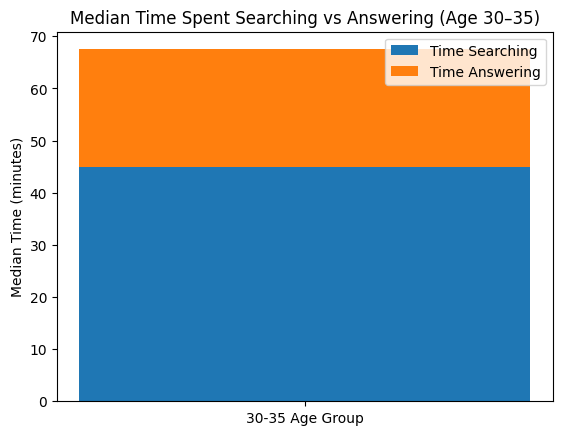

In [35]:
medians = {
    "TimeSearching": df_stacked["TimeSearching_num"].median(),
    "TimeAnswering": df_stacked["TimeAnswering_num"].median()}

import matplotlib.pyplot as plt

labels = ['30-35 Age Group']
searching = [medians["TimeSearching"]]
answering = [medians["TimeAnswering"]]

plt.bar(labels, searching, label='Time Searching')
plt.bar(labels, answering, bottom=searching, label='Time Answering')

plt.ylabel('Median Time (minutes)')
plt.title('Median Time Spent Searching vs Answering (Age 30–35)')
plt.legend()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [38]:
quEry = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL
AND CompTotal IS NOT NULL
"""

df = pd.read_sql_query(quEry, conn)
df["Age"].unique()

array(['18-24 years old', '25-34 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Under 18 years old', 'Prefer not to say'], dtype=object)

/tmp/ipykernel_328/702261402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["CompTotal"] = pd.to_numeric(df_filtered["CompTotal"], errors="coerce")


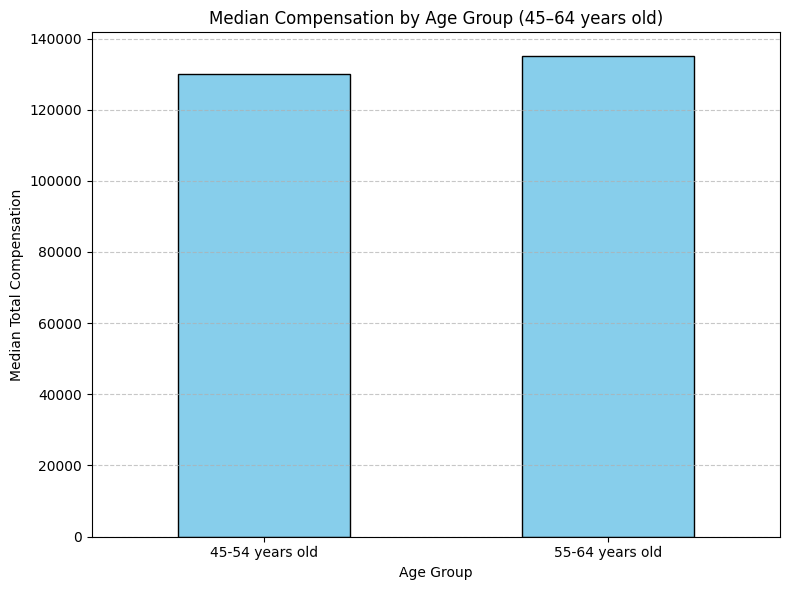

In [47]:
age_groups = ['45-54 years old', '55-64 years old']
df_filtered = df[df['Age'].isin(age_groups)]

df_filtered["CompTotal"] = pd.to_numeric(df_filtered["CompTotal"], errors="coerce")


median_comp = df_filtered.groupby("Age")["CompTotal"].median().loc[age_groups]


plt.figure(figsize=(8, 6))
median_comp.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Median Compensation by Age Group (45–64 years old)")

plt.ylabel("Median Total Compensation")
plt.xlabel("Age Group")
plt.xticks(rotation=0.1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [48]:
## Write your code here
qUery = """
SELECT MainBranch
FROM main
WHERE MainBranch IS NOT NULL
""" 

df_mb = pd.read_sql_query(qUery, conn)
df_mb 

,MainBranch
0,I am a developer by profession
1,I am a developer by profession
2,I am a developer by profession
3,I am learning to code
4,I am a developer by profession
...,...
65432,I am a developer by profession
65433,I am a developer by profession
65434,I am a developer by profession
65435,I am a developer by profession


In [50]:
df_mb["MainBranch"].unique()

array(['I am a developer by profession', 'I am learning to code',
       'I code primarily as a hobby',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

In [52]:
mb_map = {'I am a developer by profession':'I am a developer \n by profession', 
          'I am learning to code':'I am learning \n to code',
          'I code primarily as a hobby':'I code primarily \n as a hobby',
          'I am not primarily a developer, but I write code sometimes as part of my work/studies':'I am not primarily \n a developer, \n but I write code  \n sometimes as part \n of my work/studies',
          'I used to be a developer by profession, but no longer am':'I used to be \n a developer by \n profession, \n but no longer am'
         }

df_mb["MainBranch"] = df_mb["MainBranch"].map(mb_map)


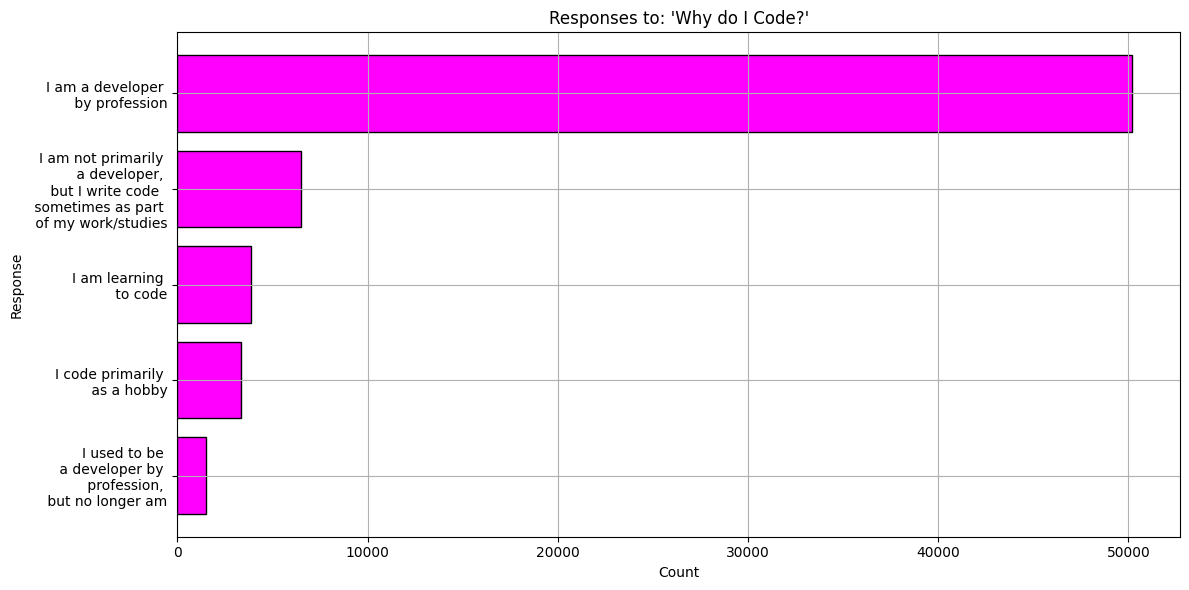

In [57]:
counts = df_mb["MainBranch"].value_counts()

plt.figure(figsize=(12, 6))


plt.barh(counts.index, counts.values, color='magenta', edgecolor="black")

plt.title("Responses to: 'Why do I Code?'")
plt.xlabel("Count")
plt.ylabel("Response")
plt.grid(True)

plt.gca().invert_yaxis() 

plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [58]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
